In [ ]:
#https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
import tensorflow as tf
import numpy as np
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
train_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
val_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')
test_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')

In [3]:
train_img_count = len(list(train_dir.glob('*/*.jpeg')))
val_img_count = len(list(val_dir.glob('*/*.jpeg')))
test_img_count = len(list(test_dir.glob('*/*.jpeg')))

print('train_img_count: ' + str(train_img_count))
print('val_img_count: ' + str(val_img_count))
print('test_img_count: ' + str(test_img_count))

train_img_count: 5216
val_img_count: 16
test_img_count: 624


In [4]:
class_names = np.array([item.name for item in (train_dir).glob('*') if item.name != '.DS_Store'])
class_names

array(['PNEUMONIA', 'NORMAL'], dtype='<U9')

In [5]:
batch_size = 32
width = 224
height = 224
steps_per_epoch = np.ceil(train_img_count/batch_size)
input_shape = (width, height, 3)

In [6]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(height, width),
                                                     classes = list(class_names),
                                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


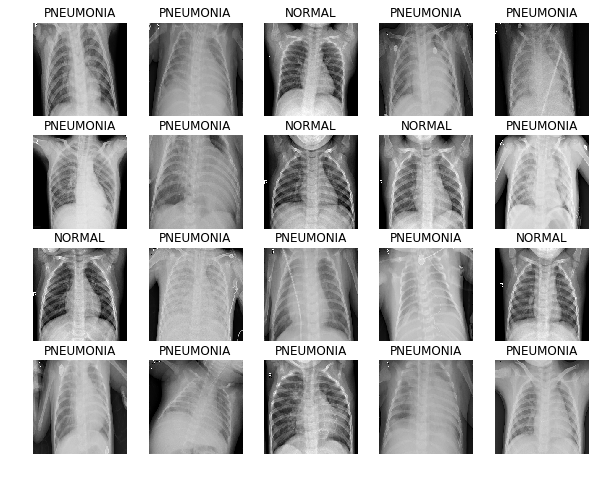

In [8]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(20):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(class_names[int(label_batch[n])])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [9]:
val_data_gen = image_generator.flow_from_directory(directory=str(val_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(height, width),
                                                     classes = list(class_names),
                                                     class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(height, width),
                                                     classes = list(class_names),
                                                     class_mode='binary')

Found 624 images belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
            train_data_gen,
            steps_per_epoch=train_img_count // batch_size,
            epochs=10,
            validation_data=val_data_gen,
            validation_steps=val_img_count // batch_size)

Epoch 1/10
 67/163 [===========>..................] - ETA: 2:14 - loss: 0.5103 - accuracy: 0.7812

In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen)
print("test_loss: ", test_loss)
print("test_acc: ", test_acc)